# Working on Iris Dataset with Pandas

In [1]:
import pandas as pd
from sklearn import datasets
import numpy as np

# Load Iris dataset

In [2]:
iris = datasets.load_iris() # Load dataset

In [3]:
colnames = ['_'.join(f.split()[:-1]) for f in iris["feature_names"]] # Extract column names

In [4]:
df = pd.DataFrame(iris['data'], columns=colnames)
df["target"] = iris["target"] # Assign target to new column in dataframe
df.sample(10) # randomly display 10 rows (use head or tail to display front and end)

,sepal_length,sepal_width,petal_length,petal_width,target
111,6.4,2.7,5.3,1.9,2
23,5.1,3.3,1.7,0.5,0
68,6.2,2.2,4.5,1.5,1
89,5.5,2.5,4.0,1.3,1
107,7.3,2.9,6.3,1.8,2
123,6.3,2.7,4.9,1.8,2
56,6.3,3.3,4.7,1.6,1
117,7.7,3.8,6.7,2.2,2
21,5.1,3.7,1.5,0.4,0
45,4.8,3.0,1.4,0.3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# How to load csv file as dataframe using pandas
# df.to_csv("iris.csv", index=False)
# del df
# df = pd.read_csv("iris.csv")

In [7]:
df["sepal"] = df["sepal_length"] + df["sepal_width"]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,sepal
0,5.1,3.5,1.4,0.2,0,8.6
1,4.9,3.0,1.4,0.2,0,7.9
2,4.7,3.2,1.3,0.2,0,7.9
3,4.6,3.1,1.5,0.2,0,7.7
4,5.0,3.6,1.4,0.2,0,8.6


In [8]:
df = df.drop("sepal", axis=1) # axis=1 refers to columns
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
type(df["sepal_length"])

pandas.core.series.Series

In [10]:
df.loc[10:15, ["sepal_length", "sepal_width"]] # access section of data using row index and column names

,sepal_length,sepal_width
10,5.4,3.7
11,4.8,3.4
12,4.8,3.0
13,4.3,3.0
14,5.8,4.0
15,5.7,4.4


In [11]:
df.iloc[10:16, 0:2] # access section of data using row index and column index

,sepal_length,sepal_width
10,5.4,3.7
11,4.8,3.4
12,4.8,3.0
13,4.3,3.0
14,5.8,4.0
15,5.7,4.4


In [12]:
df.at[10, 'sepal_length'] # basically loc but for one value (faster)

5.4

In [13]:
df.iat[10, 1] # basically iloc but for one value (faster)

3.7

In [14]:
df.drop("target", axis=1).describe().round(2) # .describe() gives statistics stuff

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


<Axes: ylabel='Density'>

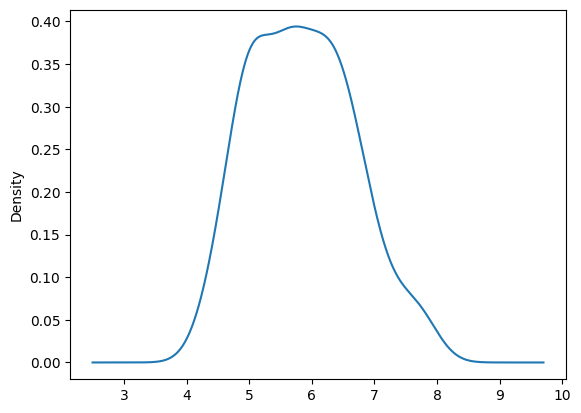

In [15]:
df.drop("target", axis=1).corr(method="pearson")
df["sepal_length"].plot(kind="kde")

In [16]:
from scipy.stats import norm

mu = df["sepal_length"].mean()
# https://stackoverflow.com/questions/31886826/numpy-1-degree-of-freedom 
sigma = df["sepal_length"].std(ddof=1) # degrees of freedom set to 1 to eliminate bias

def find_cum_prob(x):
	return norm.cdf(x, loc=mu, scale=sigma) # loc=mean, scale=sd

df["P(x <= sepal_length)"] = df["sepal_length"].apply(find_cum_prob)

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,P(x <= sepal_length)
0,5.1,3.5,1.4,0.2,0,0.184680
1,4.9,3.0,1.4,0.2,0,0.127310
2,4.7,3.2,1.3,0.2,0,0.083681
3,4.6,3.1,1.5,0.2,0,0.066614
4,5.0,3.6,1.4,0.2,0,0.154235


In [18]:
df.groupby("target")["sepal_length"].describe() # Groups data using value of target, run stats on sepal_length

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
1,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
2,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [19]:
def myfunc(x):
	return np.mean(x) + 1

df.groupby("target")["sepal_length"].agg(["mean", "std", myfunc]) # specify columns with .agg()

,mean,std,myfunc
target,,,
0,5.006,0.352490,6.006
1,5.936,0.516171,6.936
2,6.588,0.635880,7.588


<Axes: ylabel='target'>

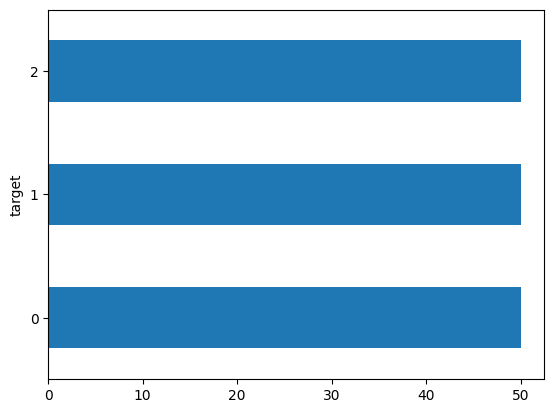

In [20]:
df["target"].value_counts().plot(kind='barh')

# Exercise 1

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

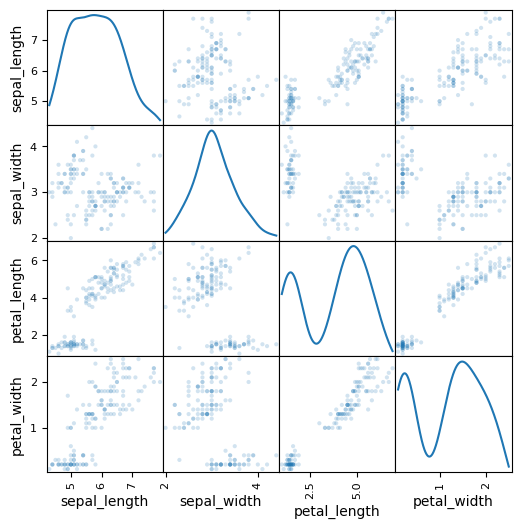

In [21]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[["sepal_length", "sepal_width", "petal_length", "petal_width"]], alpha=0.2, figsize=(6, 6), diagonal="kde")

# SQL-Style Joining

In [22]:
emp = pd.DataFrame({'empId':[1,2,3],'empName':['Dan','Penny','Sheldon'],'deptId':[102,101,None]})
dept = pd.DataFrame({'deptId':[101,102,103],'deptName':['Research','Customer Service','Marketing']})

In [23]:
from IPython.display import display_html
      
employee_styler = emp.style.set_table_attributes("style='display:inline'").set_caption('Employee')
employeeSkill_styler = dept.style.set_table_attributes("style='display:inline'").set_caption('Department')
display_html(employee_styler._repr_html_()+employeeSkill_styler._repr_html_(), raw=True)

Employee 
 
 
   
 empId 
 empName 
 deptId 
 
 
 
 
 0 
 1 
 Dan 
 102.000000 
 
 
 1 
 2 
 Penny 
 101.000000 
 
 
 2 
 3 
 Sheldon 
 nan 
 
 
 

 
 Department 
 
 
   
 deptId 
 deptName 
 
 
 
 
 0 
 101 
 Research 
 
 
 1 
 102 
 Customer Service 
 
 
 2 
 103 
 Marketing

In [24]:
pd.merge(emp, dept, on="deptId", how="left") # A

,empId,empName,deptId,deptName
0,1,Dan,102.0,Customer Service
1,2,Penny,101.0,Research
2,3,Sheldon,NaN,NaN


In [25]:
pd.merge(emp, dept, on="deptId", how="right") # B

,empId,empName,deptId,deptName
0,2.0,Penny,101.0,Research
1,1.0,Dan,102.0,Customer Service
2,NaN,NaN,103.0,Marketing


In [26]:
pd.merge(emp, dept, on="deptId", how="inner") # A n B

,empId,empName,deptId,deptName
0,1,Dan,102.0,Customer Service
1,2,Penny,101.0,Research


In [27]:
pd.merge(emp, dept, on="deptId", how="outer") # A U B

,empId,empName,deptId,deptName
0,2.0,Penny,101.0,Research
1,1.0,Dan,102.0,Customer Service
2,NaN,NaN,103.0,Marketing
3,3.0,Sheldon,NaN,NaN


# Exercise 2

In [28]:
employee = pd.DataFrame({'empId':[1,2,3], 'empName':['Dan','Penny','Sheldon']})
employeeSkill = pd.DataFrame({'empId':[1,1,2,2,3,3], 'skillId':[1,2,1,3,2,2],'skillLevel':[5,3,4,5,3,5]})
skill = pd.DataFrame({'skillId':[1,2,3],'skillName':['C','Java','Python']})

In [29]:
merged = pd.merge(employee, employeeSkill, on="empId", how="outer")
query = merged.query("skillLevel < 4")
names = query[["empName"]]
names

,empName
1,Dan
4,Sheldon


In [30]:
merged2 = pd.merge(employeeSkill, skill, on="skillId", how="outer")
query2 = merged2.query("skillId == 2")
average = query2["skillLevel"].sum() / query2["skillLevel"].size
average

3.6666666666666665

In [31]:
merged3 = pd.merge(merged, skill, on="skillId", how="outer")
query3 = merged3.query("skillName == 'Python'")
pythonNames = query3[["empName"]]
pythonNames

,empName
5,Penny


# Challenge

In [38]:
df = pd.read_csv("subjecta-concentrating-1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15192 entries, 0 to 15191
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamps  15192 non-null  float64
 1   TP9         15192 non-null  float64
 2   AF7         15192 non-null  float64
 3   AF8         15192 non-null  float64
 4   TP10        15192 non-null  float64
 5   Right AUX   15192 non-null  float64
dtypes: float64(6)
memory usage: 712.3 KB


In [39]:
df.head()

,timestamps,TP9,AF7,AF8,TP10,Right AUX
0,1.533223e+09,59.105,28.320,15.137,12.207,54.199
1,1.533223e+09,62.012,30.273,43.945,11.719,79.102
2,1.533223e+09,44.922,30.273,-97.656,11.230,32.715
3,1.533223e+09,28.809,27.832,-110.352,9.277,29.785
4,1.533223e+09,36.156,28.809,-73.242,11.230,50.781


<Axes: >

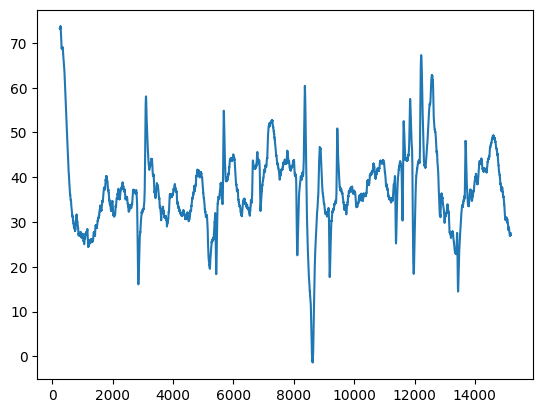

In [37]:
TP9_mean = df["TP9"].rolling(250).mean()[::125] # 250hz, so get data each sec, 125 to skip every other sec
TP9_mean.plot()

<Axes: >

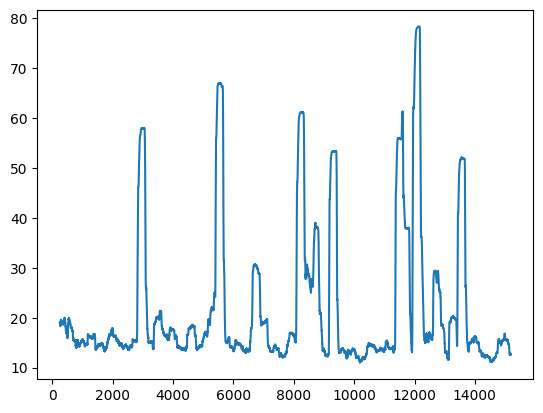

In [40]:
TP9_std = df["TP9"].rolling(250).std(ddof=0) # degree of freedom is 0 according to paper
TP9_std.plot()

In [43]:
def calcStatMoment(x, k):
	mu_k = np.mean((x - np.mean(x)) ** k)
	std_k = (x.std(ddof=0)) ** k
	return mu_k / std_k

<Axes: >

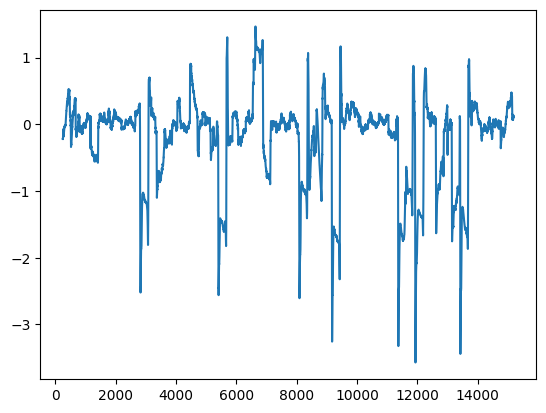

In [44]:
TP9_skewness = df["TP9"].rolling(250).apply(lambda x: calcStatMoment(x, 3))
TP9_skewness.plot()

<Axes: >

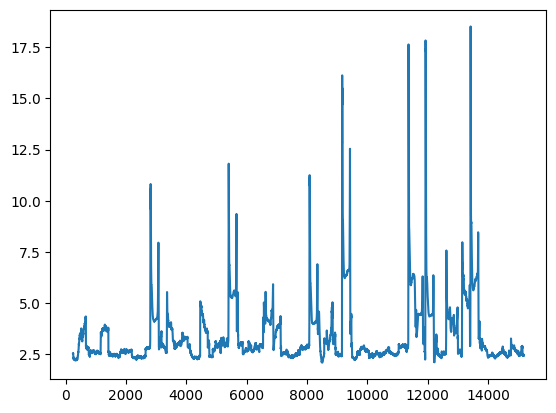

In [45]:
TP9_kurtosis = df["TP9"].rolling(250).apply(lambda x: calcStatMoment(x, 4))
TP9_kurtosis.plot()